# ERT synthetic study using pygimli package

## Sathyanarayan Rao, PhD

Here we will use pygimli package to perform a ERT synthetic study

steps: 

- Install the pygimli package using the instruction on its webpage
  https://www.pygimli.org/installation.html
- conda install -c gimli -c conda-forge pybert

- python setup.py install
https://gitlab.com/resistivity-net/bert/-/tree/master/python
  
  

### import relevant libraries and modules

In [1]:
import pygimli as pg
import pybert as pb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib  import cm
import matplotlib as mpl
cmap = mpl.colors.ListedColormap(['dodgerblue','skyblue','peru','saddlebrown']);

### import injection scheme

In [2]:
df = pd.read_excel('D:\\VEGETABLES\\Office.xlsx')
ABMN = np.array(df.loc[:, 'A':'N'])


In [3]:
ABMN

array([[ 2,  3,  4,  5],
       [ 2,  3,  5,  6],
       [ 2,  3,  6,  8],
       ...,
       [ 3,  4, 12, 10],
       [14, 16,  3,  1],
       [ 9, 11, 12, 15]], dtype=int64)

### create a forward mesh

In [4]:
import pygimli.meshtools as mt

# import electrode location file
MSH1   = pg.DataContainerERT("D:\\VEGETABLES\\test.shm");

# create a forward mesh
block = mt.createRectangle(start=[-0.1, 0], end=[1.3, -0.6], boundaryMarker=1, marker=2)
world  = mt.createWorld(start=[-2, 0], end=[3.2, -2], marker=1, worldMarker=True)

# make sure there is a node for every sensor location
for pos in MSH1.sensorPositions():
  world.createNode(pos)
  world.createNode(pos+pg.RVector3(0.0375, -0.0375))
  world.createNode(pos+pg.RVector3(-0.0375, -0.075))
  world.createNode(pos+pg.RVector3(0.0375, 0))
  world.createNode(pos+pg.RVector3(-0.0375, -0.1))
  world.createNode(pos+pg.RVector3(0.0375, -0.2))
  world.createNode(pos+pg.RVector3(-0.0375, -0.3))
  world.createNode(pos+pg.RVector3(-0.0375, -0.4))
  world.createNode(pos+pg.RVector3(0.0375, -0.5))
  world.createNode(pos+pg.RVector3(-0.0375, -0.15))
  world.createNode(pos+pg.RVector3(0.0375, -0.25))
  world.createNode(pos+pg.RVector3(-0.0375, -0.35))
  world.createNode(pos+pg.RVector3(-0.0375, -0.45))
  world.createNode(pos+pg.RVector3(0.0375, -0.55))

geom = mt.mergePLC([world, block])

fwdmesh = mt.createMesh(geom, quality=33, area= 0.1 , smooth=[1, 10])    
ert    = pb.ERTManager()
fwdmesh.save("E:\\NOTEBOOK HOBBY\\Project2\\fwdtri")
ert.setMesh(fwdmesh)
ert.paraDomain.save("E:\\NOTEBOOK HOBBY\\Project2\\fwd_para_tri");


06/05/22 - 12:35:17 - pyGIMLi - INFO - Found 2 regions.
06/05/22 - 12:35:17 - pyGIMLi - INFO - Region with smallest marker (1) set to background
06/05/22 - 12:35:17 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/05/22 - 12:35:17 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


(<AxesSubplot:>, None)

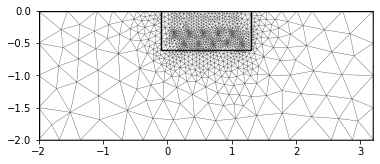

In [5]:
pg.show(fwdmesh)

### create an invert mesh

In [6]:
import pygimli.meshtools as mt
MSH1   = pg.DataContainerERT("D:\\VEGETABLES\\test.shm");


block = mt.createRectangle(start=[-0.1, 0], end=[1.3, -0.6], boundaryMarker=1, marker=2)
world  = mt.createWorld(start=[-2, 0], end=[3.2, -2], marker=1, worldMarker=True)

for pos in MSH1.sensorPositions():
  world.createNode(pos)
  world.createNode(pos+pg.RVector3(0.0375, -0.0375))
  world.createNode(pos+pg.RVector3(-0.0375, -0.075))
  world.createNode(pos+pg.RVector3(0.0375, 0))
  world.createNode(pos+pg.RVector3(-0.0375, -0.1))
  world.createNode(pos+pg.RVector3(0.0375, -0.2))
  world.createNode(pos+pg.RVector3(-0.0375, -0.3))
  world.createNode(pos+pg.RVector3(-0.0375, -0.4))
  world.createNode(pos+pg.RVector3(0.0375, -0.5))
  world.createNode(pos+pg.RVector3(-0.0375, -0.15))
  world.createNode(pos+pg.RVector3(0.0375, -0.25))
  world.createNode(pos+pg.RVector3(-0.0375, -0.35))
  world.createNode(pos+pg.RVector3(-0.0375, -0.45))
  world.createNode(pos+pg.RVector3(0.0375, -0.55))

geom = mt.mergePLC([world, block])

invmesh = mt.createMesh(geom, quality=34, area= 0.15 , smooth=[1, 10])    

invmesh.save("E:\\NOTEBOOK HOBBY\\Project2\\invtri")
ert    = pb.ERTManager()
ert.setMesh(invmesh);
ert.paraDomain.save("E:\\NOTEBOOK HOBBY\\Project2\\inv_para_tri");

06/05/22 - 12:35:18 - pyGIMLi - INFO - Found 2 regions.
06/05/22 - 12:35:18 - pyGIMLi - INFO - Region with smallest marker (1) set to background
06/05/22 - 12:35:18 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/05/22 - 12:35:18 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


(<AxesSubplot:>, None)

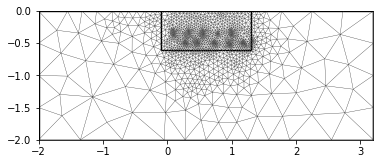

In [7]:
pg.show(invmesh)

### save a regular mesh for plotting and comparision of synthetic reality and ERT inverted image

In [8]:
X_crop        = np.round(np.arange(-0.1,1.3,0.075),3);
Z_crop        = np.linspace(0,-0.6,14);
regmesh          = pg.meshtools.createGrid(X_crop,Z_crop,marker=2,worldBoundaryMarker=True)


Z = np.array(regmesh.cellCenters())[:,1];
C = np.array(regmesh.cellMarkers());

for i in range(len(Z)):
  regmesh.cell(i).setMarker(C[i])

regmesh.save("E:\\NOTEBOOK HOBBY\\Project2\\invreg")

1

(<AxesSubplot:>, None)

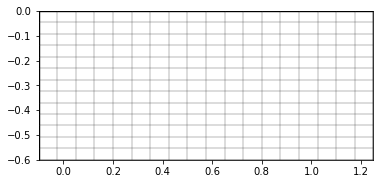

In [9]:
pg.show(regmesh)

### Define interpolation functions to carry out mapping between different meshes

In [10]:
def nearest_neighbor_interpolation(inmesh, indata, outmesh, nan=99.9):
  """ Nearest neighbor interpolation. """
  outdata = []
  for pos in outmesh.cellCenters():
      cell = inmesh.findCell(pos)
      if cell:
          outdata.append(indata[cell.id()])
      else:
          outdata.append(nan)
  return outdata



### define a function to create a synthetic resistivity forward map

In [11]:
def synthetic_rho_pattern():

  #create_mesh()

  invmesh = pg.load("E:\\NOTEBOOK HOBBY\\fwdtri.bms");
  cl = np.array(invmesh.cellMarkers());
  d = np.array(invmesh.cellCenters());

  rho = 40*np.ones([len(d),1]);
  rho[(d[:,0]>=0.2) &(d[:,0]<=0.4)&(d[:,1]<0)&(d[:,1]>-0.55)] = 60;
  rho[(d[:,0]>=0.7) &(d[:,0]<=1)&(d[:,1]<0)&(d[:,1]>-0.25)] = 60;

  indata = rho[cl==2];
  inmesh = pg.load("E:\\NOTEBOOK HOBBY\\Project2\\fwd_para_tri.bms");
  outmesh = pg.load("E:\\NOTEBOOK HOBBY\\Project2\\invreg.bms");

  outdata  = np.array(nearest_neighbor_interpolation(inmesh, indata, outmesh, nan=99.9))
  # save the cell data of interpolated image
  np.savetxt("E:\\NOTEBOOK HOBBY\\Project2\\raw_plot_rho.txt",outdata)    
  np.savetxt("E:\\NOTEBOOK HOBBY\\Project2\\mesh_ert_rho.txt",rho)

  return 

### perform ERT synthetic forward calculation

In [12]:
# import synthetic map to simulate synthetic ERT simulation 
synthetic_rho_pattern();
Rhodata         = np.loadtxt("E:\\NOTEBOOK HOBBY\\Project2\\mesh_ert_rho.txt");
fwdmesh         = pg.load("E:\\NOTEBOOK HOBBY\\Project2\\fwdtri.bms");
scheme          = pb.DataContainerERT("D:\\VEGETABLES\\test.shm");
ert             = pb.ERTManager();
data            = ert.simulate(fwdmesh, res=Rhodata, scheme=scheme);
data.set('err',ert.estimateError(data,absoluteError=0.001, relativeError=0.01));
data.save('simu.dat')



1

### Perform ERT inversion on synthetic forward data

In [13]:
# avoid inverse crime
invmesh         = pg.load("E:\\NOTEBOOK HOBBY\\Project2\\invtri.bms");
ert    = pb.ERTManager()    
ert.invert(data=data, mesh=invmesh, lam=100,blockyModel=True,robustData=False,maxIter=10,zWeight =0.7);

06/05/22 - 12:35:19 - pyGIMLi - INFO - Found 2 regions.
06/05/22 - 12:35:19 - pyGIMLi - INFO - Region with smallest marker (1) set to background
06/05/22 - 12:35:19 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/05/22 - 12:35:19 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
06/05/22 - 12:35:19 - pyGIMLi - INFO - Use median(data values)=45.065610756763135
06/05/22 - 12:35:19 - pyGIMLi - INFO - Created startmodel from forward operator: 2073 [45.065610756763135,...,45.065610756763135]


### visualize and save the inversion result

06/05/22 - 12:35:38 - pyGIMLi - INFO - Saving resistivity data to: .\20220506-12.35\ERTManager


Path .\20220506-12.35\ERTManager already exists. Skipping


('.\\20220506-12.35\\ERTManager',
 <Figure size 1152x720 with 2 Axes>,
 <AxesSubplot:>)

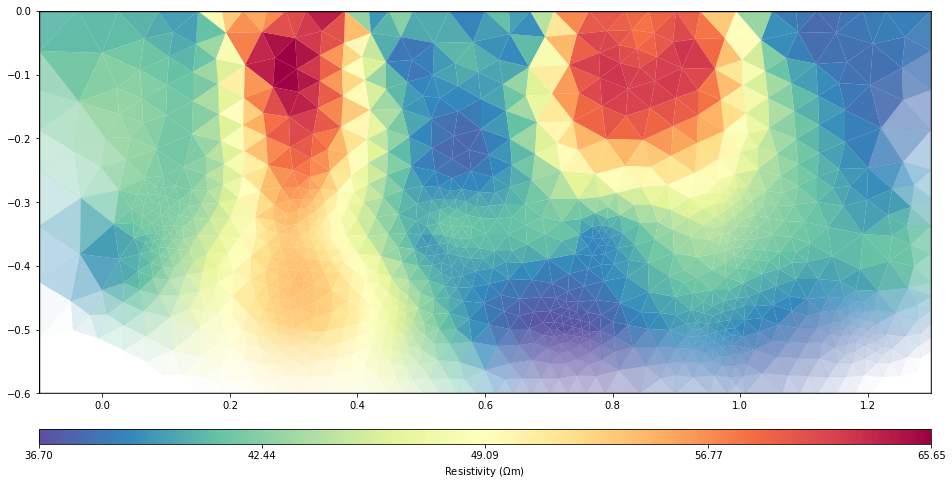

In [14]:
 ert.saveResult()


### Interpolate and save forward and inverted results unto the same mesh

In [15]:
inmesh         = pg.load("E:\\NOTEBOOK HOBBY\\Project2\\inv_para_tri.bms");
indata         = np.loadtxt("E:\\NOTEBOOK HOBBY\\Project2\\20220506-11.35\\ERTManager\\resistivity.vector");
outmesh = pg.load("E:\\NOTEBOOK HOBBY\\Project2\\invreg.bms");
outdata  = np.array(nearest_neighbor_interpolation(inmesh, indata, outmesh, nan=99.9));
np.savetxt("E:\\NOTEBOOK HOBBY\\Project2\\sim_plot_rho.txt",outdata);   
coverage    = np.array(ert.coverage()) 
outcov  = np.array(nearest_neighbor_interpolation(inmesh, coverage, outmesh, nan=99.9))
np.savetxt("E:\\NOTEBOOK HOBBY\\Project2\\coverage.txt",outcov)    

### Visulize coverage, synthetic reality and ERT inverted result on the same regular mesh

Text(0.5, 1.0, 'ERT derived truth')

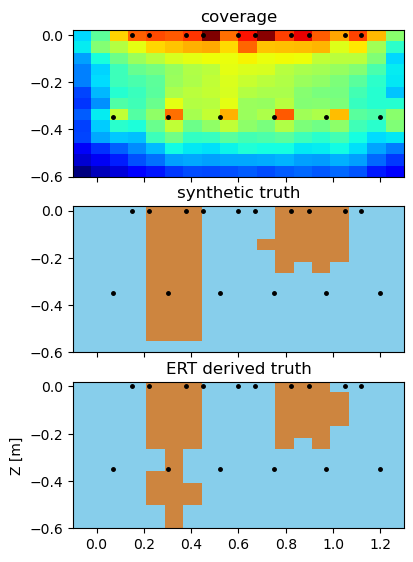

In [16]:


fig1, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(4.4,6.6),dpi=100,sharex=True)

MSH1   = pg.DataContainerERT("D:\\VEGETABLES\\test.shm");
coverage = np.loadtxt("E:\\NOTEBOOK HOBBY\\Project2\\coverage.txt")
ax1.imshow(coverage.reshape(13,18),\
          cmap=cm.jet,extent=(-0.1,1.3,-0.6,0.02))

X = np.array(pg.x(MSH1.sensorPositions()));
Y = np.array(pg.y(MSH1.sensorPositions()));
ax1.plot(X, Y, "k.", ms=5)
ax1.set_title('coverage')

rho_para = np.loadtxt("E:\\NOTEBOOK HOBBY\\Project2\\raw_plot_rho.txt")
ax2.imshow(np.log10(rho_para).reshape(13,18),vmin=1.4,vmax=2,\
          cmap=cmap,extent=(-0.1,1.3,-0.6,0.02))
ax2.plot(X, Y, "k.", ms=5)
ax2.set_title('synthetic truth')

rho_para = np.loadtxt("E:\\NOTEBOOK HOBBY\\Project2\\sim_plot_rho.txt")
ax3.imshow(np.log10(rho_para).reshape(13,18),vmin=1.4,vmax=2,\
          cmap=cmap,extent=(-0.1,1.3,-0.6,0.02))

ax3.set_ylabel('Z [m]')
ax3.plot(X, Y, "k.", ms=5)
ax3.set_title('ERT derived truth')
